In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [9]:
#시각화

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [10]:
# 데이터 불러오기

train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
sub = pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")

train.shape, test.shape, sub.shape

((8693, 14), (4277, 13), (4277, 2))

Text(0.5, 1.0, 'Target distribution')

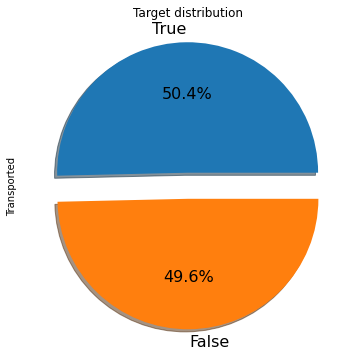

In [16]:
# Figure size
plt.figure(figsize=(6,6))

# Pie plot
train['Transported'].value_counts().plot.pie(explode=[0.1,0.1],
                                             autopct='%1.1f%%',
                                             shadow=True,
                                             textprops={'fontsize':16}).set_title("Target distribution")

Text(0.5, 0, 'Age (years)')

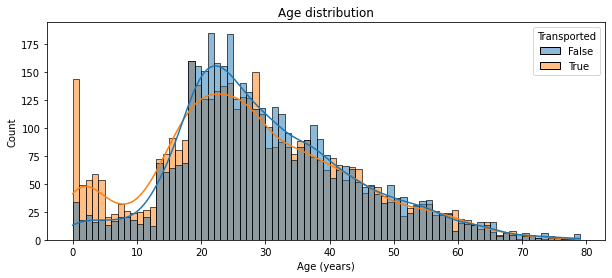

In [13]:
plt.figure(figsize=(10,4))

sns.histplot(data=train, x='Age', hue='Transported', binwidth=1, kde=True)

plt.title('Age distribution')
plt.xlabel('Age (years)')

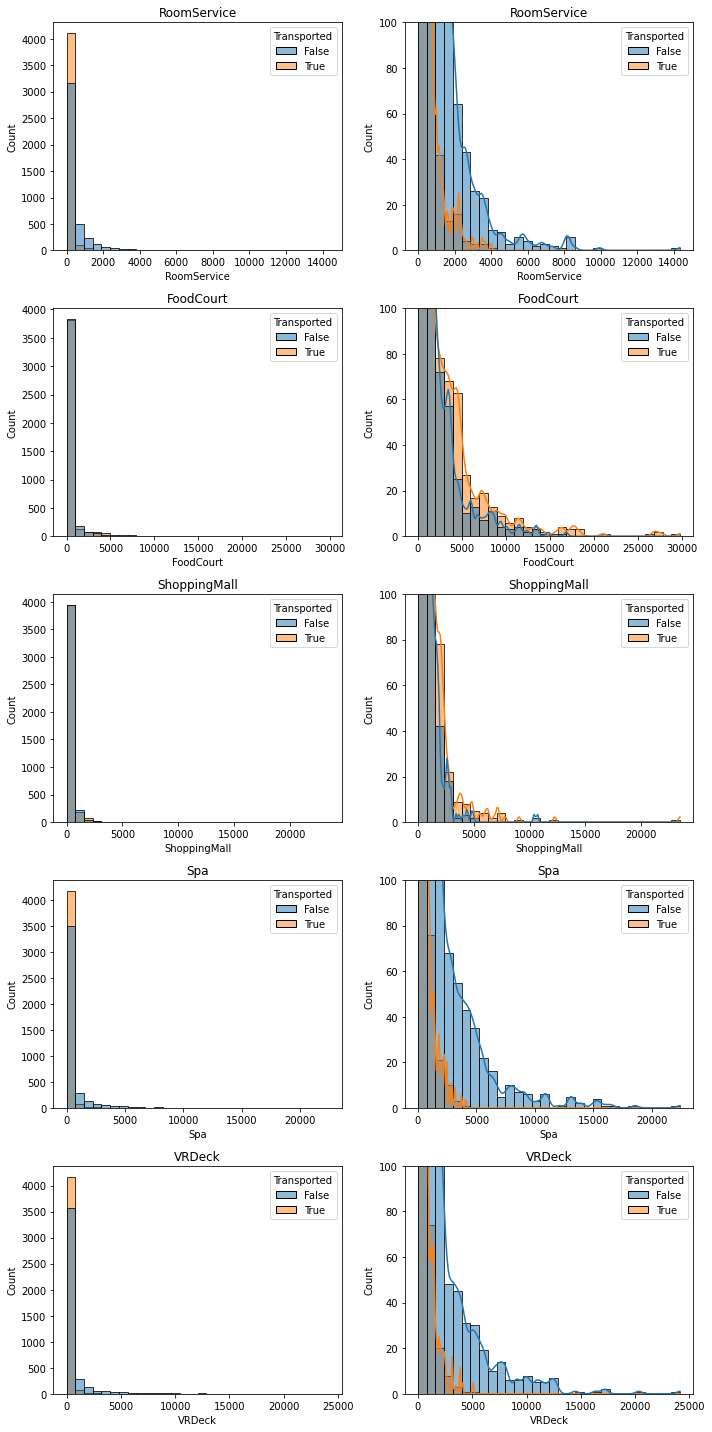

In [15]:
# expenditure features
exp_feats = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# plot expenditure features
fig = plt.figure(figsize=(10,20))
for i, var_name in enumerate(exp_feats):
    # left plot
    ax = fig.add_subplot(5, 2, 2*i+1)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(var_name)
    
    # right plot (truncated)
    ax = fig.add_subplot(5, 2, 2*i+2)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0, 100])
    ax.set_title(var_name)
fig.tight_layout()
plt.show()